<a href="https://colab.research.google.com/github/NiniveGeraldine/EmployeeTurnover/blob/master/EmployeeDataIQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GENERAL

EXTRACCIÓN Y LIMPIEZA

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
from google.colab import drive
drive.mount('/content/drive')
employee_df = pd.read_csv('/content/drive/MyDrive/DataIQ/general_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
employee_df['NumCompaniesWorked'] = employee_df['NumCompaniesWorked'].fillna(0)
employee_df['TotalWorkingYears'] = employee_df['TotalWorkingYears'].fillna(0)


In [109]:
employee_df['NumCompaniesWorked'] = employee_df['NumCompaniesWorked'].astype(int)
employee_df['TotalWorkingYears'] = employee_df['TotalWorkingYears'].astype(int)

In [110]:
employee_df = employee_df.drop('EmployeeID', axis = 1) 
employee_df = employee_df.drop('StandardHours', axis = 1) 
employee_df = employee_df.drop('EmployeeCount', axis = 1) 
employee_df = employee_df.drop('Over18', axis = 1) 

In [111]:
employee_df.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
Gender                     object
JobLevel                    int64
JobRole                    object
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [112]:
employee_df.isna().sum()


Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [113]:
employee_df.isnull().values.any()

False

In [114]:
employee_df.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1,11,0,1,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0,23,1,6,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1,15,3,5,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3,11,3,13,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4,12,2,9,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,Female,4,Research Director,Married,40710,3,13,0,28,5,7,7,7
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,Male,2,Sales Executive,Single,58130,2,20,1,5,2,0,0,0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,Male,2,Sales Executive,Married,31430,2,22,3,10,2,0,0,0
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,Male,3,Laboratory Technician,Married,20440,0,21,0,10,2,9,7,8
9,25,No,Non-Travel,Research & Development,7,4,Medical,Female,4,Laboratory Technician,Divorced,134640,1,13,1,6,2,6,1,5


ANÁLISIS EXPLORATORIO

In [115]:
employee_df.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2.063946,65029.312925,2.683220,15.209524,0.793878,11.256916,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,1.106689,47068.888559,2.499737,3.659108,0.851883,7.790928,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [116]:
employee_df['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

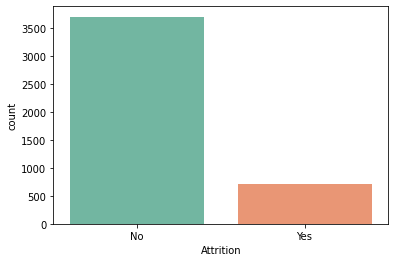

In [117]:
sns.countplot(x='Attrition', data=employee_df, palette='Set2')

In [118]:
for column in employee_df.columns:
    if employee_df[column].dtype == object:
        print(str(column) + ' : ' + str(employee_df[column].unique()))
        print(employee_df[column].value_counts())
        print("-----------------------------------------------------")

Attrition : ['No' 'Yes']
No     3699
Yes     711
Name: Attrition, dtype: int64
-----------------------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64
-----------------------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64
-----------------------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64
-----------------------------------------------------
Gender : ['Female' 'Male']
Male      2646
Fema

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>],
       [<AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>],
       [<AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

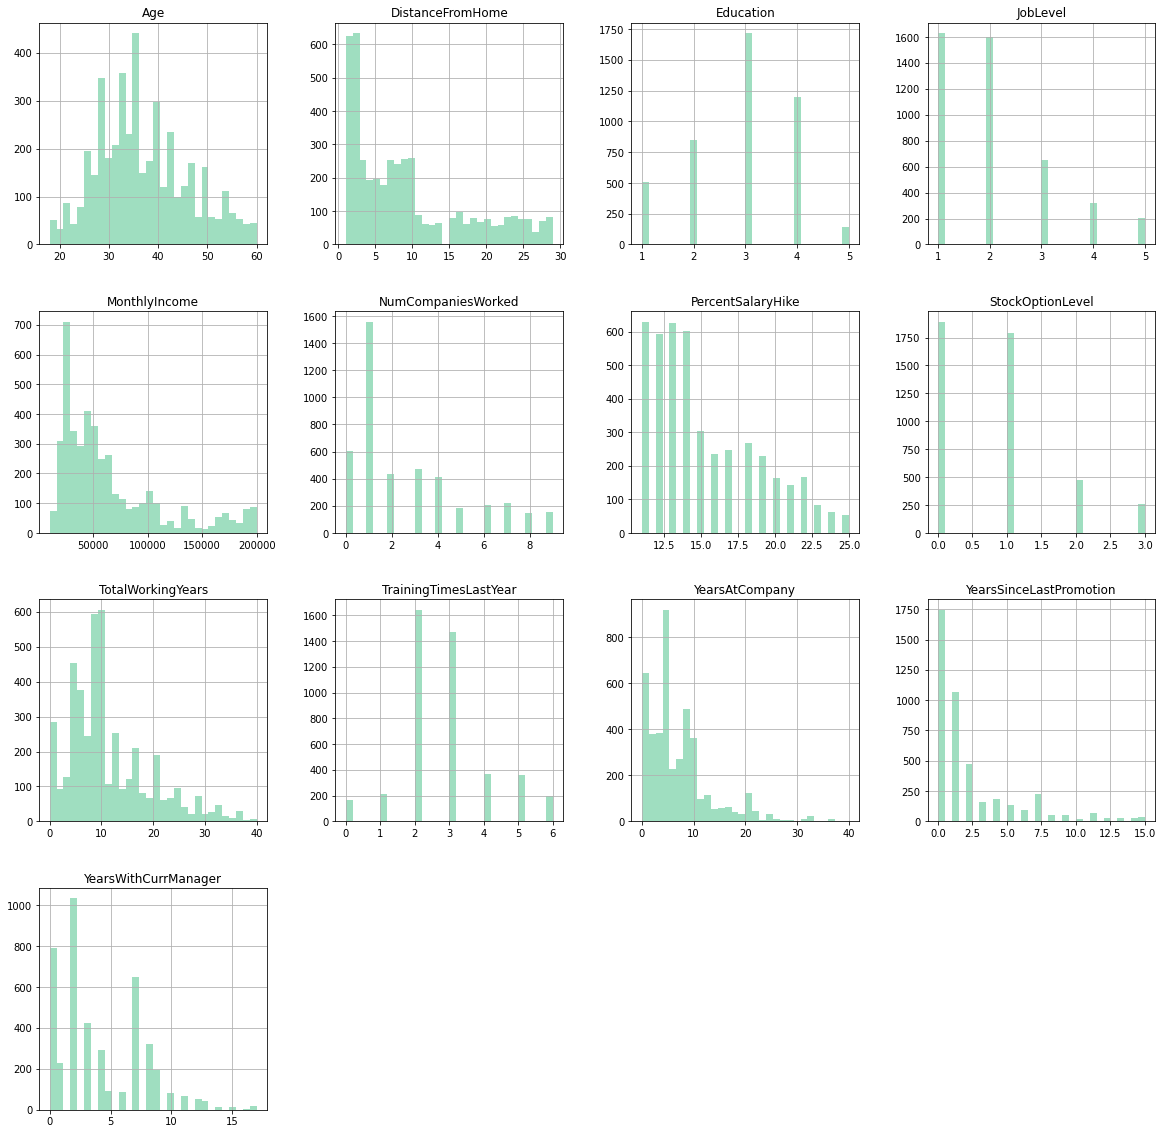

In [119]:
employee_df.hist(bins=30, color='#9fdec0', figsize=(20,20))

Analisis en qlik

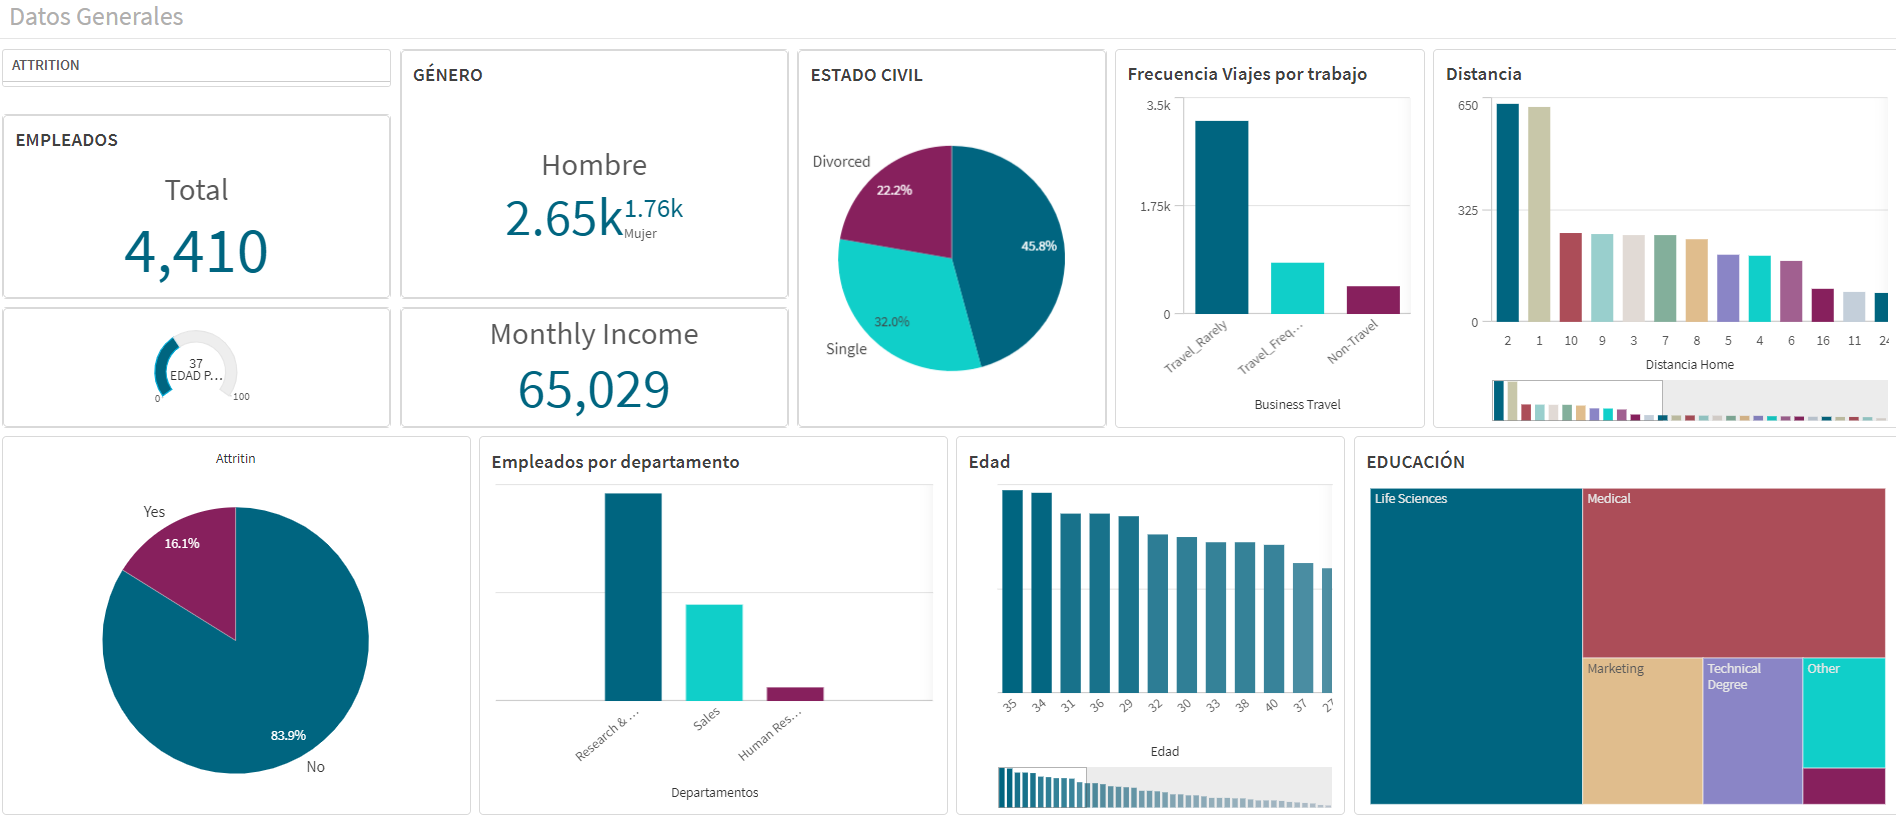

In [120]:
employee_df.corr()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.006963,-0.035706,-0.002884,-0.044314,0.299297,-0.033137,-0.031753,0.678436,-0.027308,0.311309,0.216513,0.202089
DistanceFromHome,0.006963,1.000000,-0.008638,-0.037329,-0.021607,-0.012617,0.038125,0.011169,0.008925,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.008638,1.000000,0.045746,0.006410,-0.016096,-0.040531,0.001261,-0.011581,0.010472,0.006080,0.022490,0.005358
JobLevel,-0.002884,-0.037329,0.045746,1.000000,0.047316,-0.010877,0.010973,0.000993,-0.035498,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.021607,0.006410,0.047316,1.000000,-0.019915,0.004325,0.026930,-0.033694,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.299297,-0.012617,-0.016096,-0.010877,-0.019915,1.000000,0.031683,0.017685,0.237472,-0.032123,-0.116322,-0.035421,-0.108223
PercentSalaryHike,-0.033137,0.038125,-0.040531,0.010973,0.004325,0.031683,1.000000,0.012548,-0.019495,-0.037392,-0.029707,-0.029542,-0.040864
StockOptionLevel,-0.031753,0.011169,0.001261,0.000993,0.026930,0.017685,0.012548,1.000000,0.003128,-0.069902,0.007886,0.019063,0.017757
TotalWorkingYears,0.678436,0.008925,-0.011581,-0.035498,-0.033694,0.237472,-0.019495,0.003128,1.000000,-0.041842,0.624468,0.403405,0.457363
TrainingTimesLastYear,-0.027308,-0.009001,0.010472,-0.032500,0.050112,-0.032123,-0.037392,-0.069902,-0.041842,1.000000,-0.007894,0.016121,-0.013270


<AxesSubplot:>

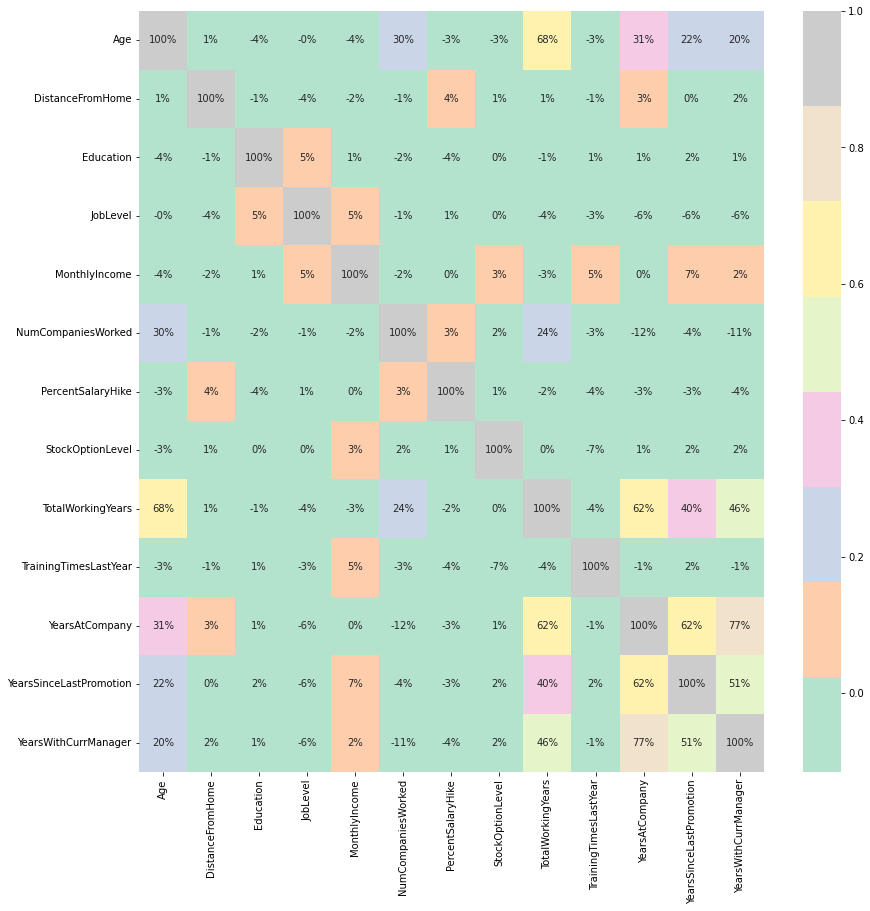

In [121]:
plt.figure(figsize=(14,14))
sns.heatmap(employee_df.corr(), annot=True, fmt='.0%', cmap="Pastel2")

In [122]:
importances = pd.DataFrame({'feature':employee_df.iloc[:, 1:employee_df.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
MaritalStatus,0.109
YearsWithCurrManager,0.109
StockOptionLevel,0.095
Department,0.071
TrainingTimesLastYear,0.067
NumCompaniesWorked,0.064
MonthlyIncome,0.054
TotalWorkingYears,0.052
JobLevel,0.051


# ALGORITMO 

In [123]:
from sklearn.preprocessing import LabelEncoder

In [124]:
from sklearn.preprocessing import LabelEncoder

for column in employee_df.columns:
        if employee_df[column].dtype == np.number:
            continue
        employee_df[column] = LabelEncoder().fit_transform(employee_df[column])

<ipython-input-124-29adc069711d>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if employee_df[column].dtype == np.number:


In [125]:
employee_df['Age_Years'] =  employee_df['Age']
employee_df = employee_df.drop('Age', axis = 1)

In [126]:
#Validación conversión variables categoricas
employee_df

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,0,2,2,5,1,1,0,0,0,1,1166,1,0,0,1,6,1,0,0,33
1,1,1,1,9,0,1,0,0,6,2,505,0,12,1,6,3,5,1,4,13
2,0,1,1,16,3,4,1,3,7,1,1318,1,4,3,5,2,5,0,3,14
3,0,0,1,1,4,1,1,2,1,1,984,3,0,3,13,5,8,7,5,20
4,0,2,1,9,0,3,1,0,7,2,145,4,1,2,9,2,6,0,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0,2,1,4,3,3,0,0,6,2,810,3,6,1,10,5,3,0,2,24
4406,0,2,1,1,3,3,1,0,2,0,240,2,4,0,10,2,3,0,2,11
4407,0,2,1,24,1,1,1,1,7,1,434,0,9,0,5,4,4,1,2,7
4408,0,2,2,17,1,3,1,0,2,0,164,0,3,1,10,2,9,7,8,24


In [127]:
X = employee_df.iloc[:, 1:employee_df.shape[1]].values 
Y = employee_df.iloc[:, 0].values 

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


In [129]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [130]:
forest.score(X_train, Y_train)

0.998185666767463

In [131]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()

[[932   0]
 [ 17 154]]
Model Testing Accuracy = "0.9845874886672711!"



In [132]:
importances = pd.DataFrame({'feature':employee_df.iloc[:, 1:employee_df.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
MonthlyIncome,0.109
Age_Years,0.109
TotalWorkingYears,0.095
DistanceFromHome,0.071
YearsAtCompany,0.067
PercentSalaryHike,0.064
NumCompaniesWorked,0.054
TrainingTimesLastYear,0.052
JobRole,0.051


In [133]:
left_df= employee_df[employee_df.Attrition==1]
stayed_df= employee_df[employee_df.Attrition==0]

In [134]:
print('Total=', len(employee_df))
print('% Renuncian = ',1*len(left_df)/len(employee_df)*100 ,'%')
print('% No renuncian = ',1*len(stayed_df)/len(employee_df)*100 ,'%')

Total= 4410
% Renuncian =  16.122448979591837 %
% No renuncian =  83.87755102040816 %


Pruebas

In [135]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()

[[932   0]
 [ 17 154]]
Model Testing Accuracy = "0.9845874886672711!"



# PREDICTIVO

In [136]:
new_employee_df = pd.read_csv('/content/drive/MyDrive/DataIQ/actual_general_data.csv')

In [137]:
new_employee_df['NumCompaniesWorked'] = new_employee_df['NumCompaniesWorked'].fillna(0)
new_employee_df['TotalWorkingYears'] = new_employee_df['TotalWorkingYears'].fillna(0)
new_employee_df['Attrition'] = new_employee_df['Attrition'].fillna(1)

In [138]:
new_employee_df = new_employee_df.drop('EmployeeID', axis = 1) 
new_employee_df= new_employee_df.drop('StandardHours', axis = 1) 
new_employee_df =new_employee_df.drop('EmployeeCount', axis = 1) 
new_employee_df = new_employee_df.drop('Over18', axis = 1) 

In [139]:
new_employee_df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [140]:
from sklearn.preprocessing import LabelEncoder
for column in new_employee_df.columns:
    if new_employee_df[column].dtype == np.number:
        continue
    new_employee_df[column] = LabelEncoder().fit_transform(new_employee_df[column])
new_employee_df['Age_Years'] = new_employee_df['Age']
new_employee_df = new_employee_df.drop('Age', axis = 1)

<ipython-input-140-54cdb7855e9d>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if new_employee_df[column].dtype == np.number:


In [141]:
X_new = new_employee_df.iloc[:, 1:new_employee_df.shape[1]].values 
Y_pred = forest.predict(X_new)

In [142]:
new_employee_df['Attrition_Pred'] = Y_pred

In [143]:
new_employee_df

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years,Attrition_Pred
0,1.0,2,2,5,1,1,0,0,0,1,...,1.0,0,0,1.0,6,1,0,0,33,0
1,1.0,1,1,9,0,1,0,0,6,2,...,0.0,12,1,6.0,3,5,1,4,13,1
2,1.0,1,1,16,3,4,1,3,7,1,...,1.0,4,3,5.0,2,5,0,3,14,0
3,1.0,0,1,1,4,1,1,2,1,1,...,3.0,0,3,13.0,5,8,7,5,20,0
4,1.0,2,1,9,0,3,1,0,7,2,...,4.0,1,2,9.0,2,6,0,4,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,1.0,2,1,4,3,3,0,0,6,2,...,3.0,6,1,10.0,5,3,0,2,24,0
4406,1.0,2,1,1,3,3,1,0,2,0,...,2.0,4,0,10.0,2,3,0,2,11,0
4407,1.0,2,1,24,1,1,1,1,7,1,...,0.0,9,0,5.0,4,4,1,2,7,0
4408,1.0,2,2,17,1,3,1,0,2,0,...,0.0,3,1,10.0,2,9,7,8,24,0


In [144]:
encoder = LabelEncoder()
new_employee_df['Department'] = encoder.fit_transform(new_employee_df['Department'])
new_employee_df['Department'] = encoder.inverse_transform(new_employee_df['Department'])

In [145]:
new_employee_df.to_csv('/content/drive/MyDrive/DataIQ/file3.csv', index=False)

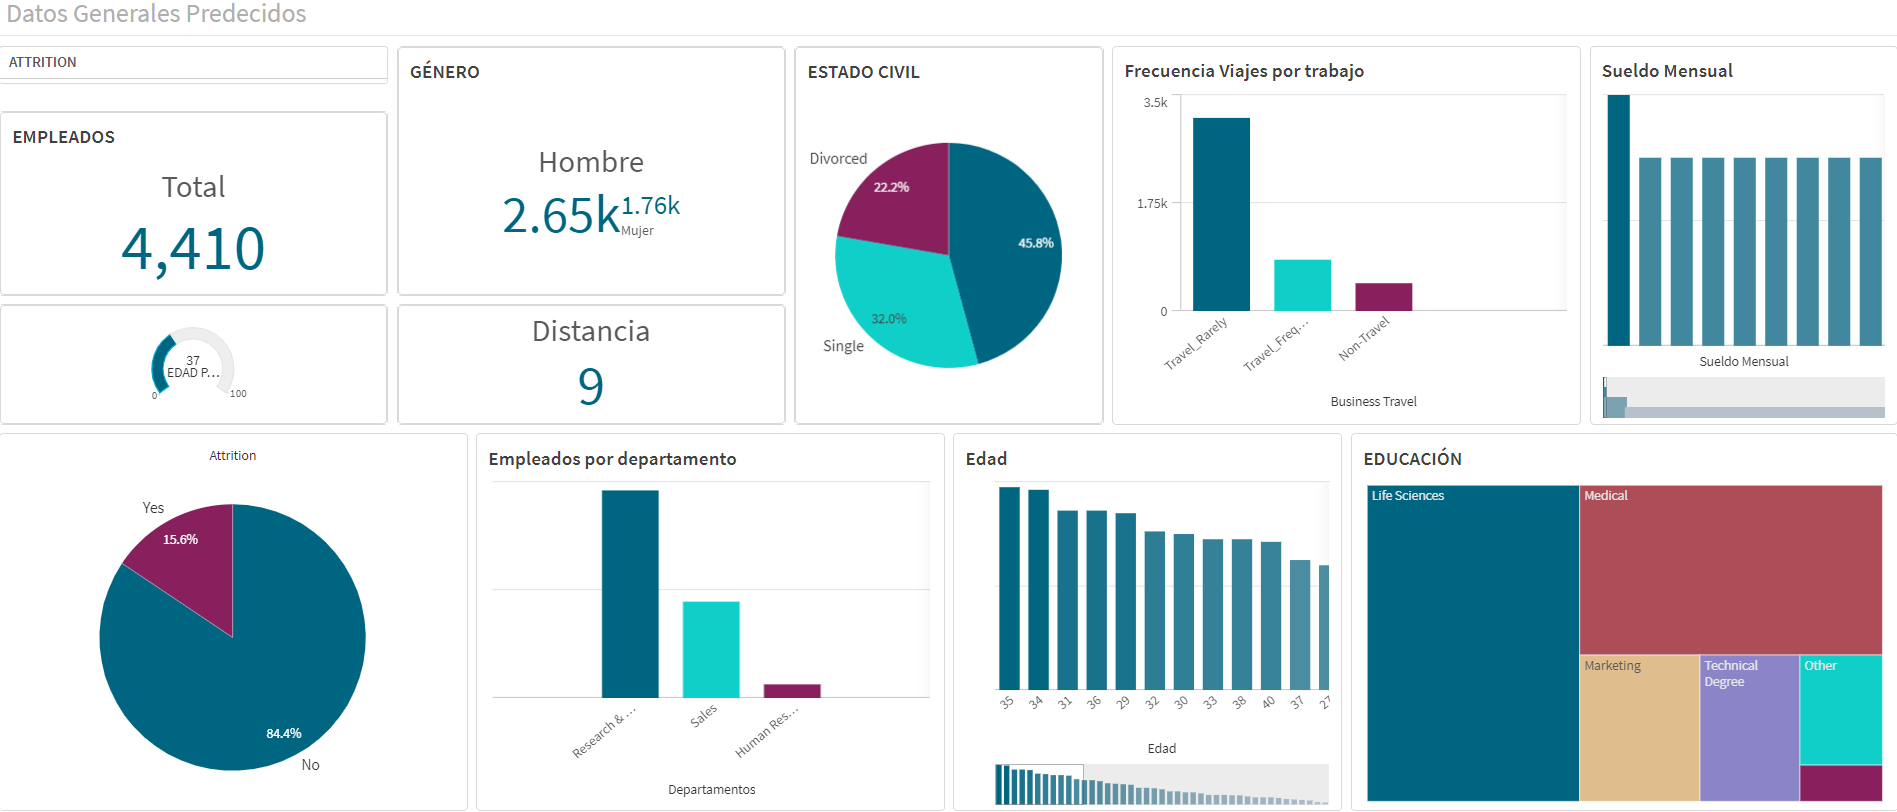